<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Tec%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20Gleb%206-8/telecom_test_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import pandas as pd
import numpy as np

In [292]:
!gdown --id 1dixOdPOIE4VwO38RZVE-e7U15d6p47lY

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dixOdPOIE4VwO38RZVE-e7U15d6p47lY
To: /content/task_k.zip
100% 13.2M/13.2M [00:00<00:00, 107MB/s] 


In [293]:
!unzip task_k.zip

Archive:  task_k.zip
replace task_k/hashed_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/hashed_feature.csv  
replace task_k/tabular_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/tabular_data.csv  
replace task_k/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/test.csv         
replace task_k/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/train.csv        
replace task_k/Задание.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: task_k/Задание.txt  


In [294]:
train = pd.read_csv('/content/task_k/train.csv')

In [295]:
tabular_data = pd.read_csv('/content/task_k/tabular_data.csv')

In [296]:
hash_feature = pd.read_csv('/content/task_k/hashed_feature.csv')

In [297]:
hash_feature.isna().mean()

,0
id,0.000000
feature_50,0.001518


In [298]:
hash_feature.dropna(inplace=True)

In [299]:
hash_joined = hash_feature.groupby('id')['feature_50'].apply(lambda x: ' '.join(x)).reset_index()

In [300]:
hash_joined

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,db6e2207646e991c7c196063bdc9377fb416c732 745dd...
...,...,...
5099,5101,b50e6165624dc0f22b903721073c83c9c4bf8e74 bb50d...
5100,5102,79f660e95ae1317367600f5d6e98fde88419e787 6d1fc...
5101,5103,82ceabdac9000e930721b094494ff2ad2266134f c161a...
5102,5104,5123d0309f8aa93858132ea6adf7ad12f636a391 e9649...


In [301]:
df = train.merge(hash_joined,how='left',on='id')

In [302]:
df.head()

,id,target,feature_50
0,0,0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,0,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,1,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,0,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,1,db6e2207646e991c7c196063bdc9377fb416c732 745dd...


In [303]:
df.isna().mean()

,0
id,0.000000
target,0.000000
feature_50,0.000245


In [304]:
df.dropna(inplace=True)

In [305]:
df.isna().mean()

,0
id,0.0
target,0.0
feature_50,0.0


In [306]:
train = df.sample(frac=0.7,random_state=42).copy()

In [307]:
val = df[~df.index.isin(train.index)]

In [308]:
len(train) + len(val)

4083

In [309]:
!pip install catboost

In [310]:
X_col = ['feature_50']
y_col = ['target']
text_features = ['feature_50']

In [311]:
from catboost import CatBoostClassifier

In [312]:
model = CatBoostClassifier(learning_rate=0.01,verbose=100,eval_metric='AUC',

                           text_features=text_features,
                           )
model.fit(train[X_col],train[y_col],eval_set=(val[X_col],val[y_col]),early_stopping_rounds=100)


0:	test: 0.5217302	best: 0.5217302 (0)	total: 270ms	remaining: 4m 29s
100:	test: 0.6318352	best: 0.6428454 (34)	total: 31s	remaining: 4m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6428454068
bestIteration = 34

Shrink model to first 35 iterations.


In [313]:
fi = pd.DataFrame({'name':X_col,'w':model.feature_importances_})
fi

,name,w
0,feature_50,100.0


In [314]:
hash_joined['feature_50']

,feature_50
0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,db6e2207646e991c7c196063bdc9377fb416c732 745dd...
...,...
5099,b50e6165624dc0f22b903721073c83c9c4bf8e74 bb50d...
5100,79f660e95ae1317367600f5d6e98fde88419e787 6d1fc...
5101,82ceabdac9000e930721b094494ff2ad2266134f c161a...
5102,5123d0309f8aa93858132ea6adf7ad12f636a391 e9649...


In [315]:
tabular_data

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61267,5105,8,110.0,77.0,NaN,0.000000,95.30,0.0,0.094381,221.85,...,-0.00,0,0.000000,0.0,75.0,0.0,0.082128,43.0,83.97,0.0
61268,5105,9,110.0,77.0,NaN,0.000000,61.87,0.0,0.105878,343.22,...,1.75,0,0.000000,0.0,75.0,0.0,0.077594,49.0,48.02,0.0
61269,5105,10,110.0,106.5,NaN,0.000000,88.05,0.0,0.040169,259.33,...,8.27,0,0.000000,0.0,99.0,1.0,0.109053,43.0,74.52,0.0
61270,5105,11,110.0,45.0,NaN,0.000000,98.40,0.0,0.040810,222.00,...,0.00,0,0.000000,0.0,0.0,0.0,0.101929,35.0,25.83,0.0


In [316]:
tabular_data['feature_41'].mean()

np.float64(0.0)

In [317]:
try:
  tabular_data.drop('feature_41',axis=1,inplace=True)
except:
  pass

In [318]:
tabular_data[tabular_data['id'] == 0]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0.00,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,15.75,0.00,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.00,0.07,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0.00,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,26.75,0.95,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83,0.0
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.0,0.494765,NaN,...,38.37,0.24,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20,0.0
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.0,0.522715,NaN,...,0.00,1.56,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97,0.0
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.0,0.537815,NaN,...,0.00,1.17,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95,0.0
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.0,0.547634,NaN,...,0.00,0.37,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97,0.0
9,0,10,110.0,60.00,0.129596,1099.289203,608.28,0.0,0.438465,NaN,...,0.00,0.33,18.577763,0.0,55.75,1.0,0.571826,151.0,500.32,0.0


In [319]:
tabular_data[tabular_data['id'] == 0]['feature_6'].mean()

np.float64(0.44533218824971676)

In [320]:
tabular_data[tabular_data['id'] == 2]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
24,2,1,110.0,1.17,NaN,0.000000,4.05,0.0,0.603306,NaN,...,0.0,0.00,0.000000,0.0,1.17,0.0,0.258322,18.0,2.97,0.0
25,2,2,110.0,0.00,NaN,1.696433,31.55,0.0,0.561896,NaN,...,0.0,1.43,0.000987,0.0,0.00,0.0,0.168614,43.0,18.53,0.0
26,2,3,111.0,0.00,NaN,0.000000,0.00,0.0,0.293535,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.123248,1.0,0.00,0.0
27,2,4,110.0,0.00,NaN,0.000000,0.55,0.0,0.410363,NaN,...,0.0,0.02,0.000000,0.0,0.00,0.0,0.120390,10.0,0.53,0.0
28,2,5,111.0,0.00,NaN,0.000000,0.00,0.0,0.297032,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.143256,0.0,0.00,0.0
29,2,6,110.0,0.00,NaN,0.000000,4.20,0.0,0.210948,NaN,...,0.0,2.43,0.000000,0.0,0.00,0.0,0.106082,9.0,1.77,0.0
30,2,7,110.0,0.00,5.203073,0.000000,0.18,0.0,0.119820,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.108917,6.0,0.00,0.0
31,2,8,110.0,0.00,NaN,0.000000,2.12,0.0,0.557776,NaN,...,0.0,0.77,0.000000,0.0,0.00,0.0,0.280998,4.0,1.35,0.0
32,2,9,110.0,6.00,NaN,0.000000,0.45,0.0,0.752144,NaN,...,0.0,0.13,0.000000,0.0,6.00,0.0,0.267303,4.0,0.22,0.0
33,2,10,110.0,0.00,NaN,0.000000,3.38,0.0,5.160770,NaN,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.269059,18.0,2.45,0.0


In [321]:
tabular_data[tabular_data['id'] == 2]['feature_6'].mean()

np.float64(0.8750142503174243)

In [322]:
train

,id,target,feature_50
599,599,1,610e5eb9ab3b20e91f87fca45bbd503026ed850b fd5d5...
752,752,0,f8c0d4314358167ff143e44b5d4f212ff22bbf52 eaeff...
2775,2775,0,2dd869f0ad1c5aaa372f751bd87b6797ea679563 3f983...
2929,2929,1,211c2e4a55192e09f5054fa0ae58fab6ab4d0460 27376...
2513,2513,1,7b5aa9f2b936ee5953d3c36d946d84795e415d1c 38b81...
...,...,...,...
3314,3314,0,2ac29c37297d8db57f702bd6557d405e7c2a3ae0 7984b...
3323,3323,0,4f3ddb232613c6ecc6000e84c05fe1a42858f4ab 8f3c3...
375,375,1,b1cbe9d0e6da7d3296e4ee0e8a8c64f5db5516a7 24895...
1908,1908,0,9cc35e91f9c0aa2bdd08df9e7cbb2a00a095912e 342ab...


In [323]:
len(train)

2858

In [324]:
df = tabular_data.merge(train[['id','target']],on='id').copy()

In [325]:
df.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0,0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0,0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0,0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0,0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0,0


In [326]:
len(df)

34296

In [327]:
df.groupby('target')['feature_6'].agg(['count','mean','median'])

,count,mean,median
target,,,
0,23577,0.527250,0.432165
1,8711,0.697628,0.637733


In [328]:
import hashlib
print(len(hashlib.md5("23443".encode('utf-8')).hexdigest()))

32


In [329]:
hash_feature['feature_50'].str.len().mean()

np.float64(40.0)

In [330]:
df.groupby('target')['feature_46'].agg(['count','mean','median'])

,count,mean,median
target,,,
0,21758,0.367201,0.313686
1,7966,0.578354,0.741600


In [331]:
df.groupby('feature_25')['target'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
feature_25,,
cf3cca1da7361bd988642600e76c4a3021be8ccf,54,0.481481
d458ece2abeae803254c5d442b2e2a80f58a4153,193,0.393782
f9ae10397ed62e79c644d06842bbcd92963a5927,20861,0.289727
390c481a740bb1c12c57f33dc5263ced2ab11796,797,0.250941
11e623a37e87cf7995c466723ec99688d55cae8c,2217,0.244475
b204e1e3743cc314841070435211e25f4602b9fd,7251,0.234450
aa2c96dacf00c451ef465f6115a45a20bccf1256,2920,0.186301
cf7413906c99be47067cb3fb6299959857710d77,3,0.000000


In [332]:
df['feature_25'].value_counts(normalize=True)

,proportion
feature_25,
f9ae10397ed62e79c644d06842bbcd92963a5927,0.608263
b204e1e3743cc314841070435211e25f4602b9fd,0.211424
aa2c96dacf00c451ef465f6115a45a20bccf1256,0.085141
11e623a37e87cf7995c466723ec99688d55cae8c,0.064643
390c481a740bb1c12c57f33dc5263ced2ab11796,0.023239
d458ece2abeae803254c5d442b2e2a80f58a4153,0.005627
cf3cca1da7361bd988642600e76c4a3021be8ccf,0.001575
cf7413906c99be47067cb3fb6299959857710d77,0.000087


<Axes: >

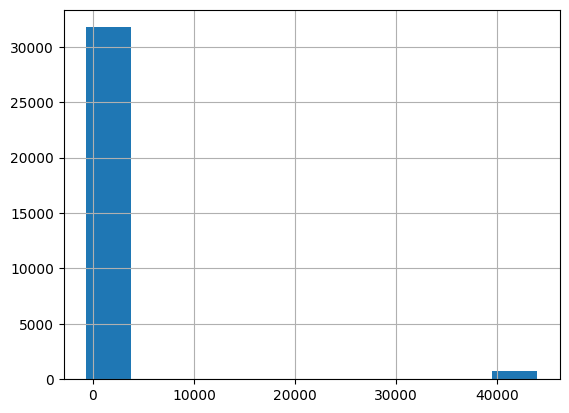

In [333]:
df['feature_11'].hist()

In [334]:
df['feature_11'].value_counts()

,count
feature_11,
0.000000,4146
55.000000,1892
75.000000,1359
35.000000,547
50.000000,426
...,...
40240.473334,1
40526.182945,1
8.670000,1


In [335]:
df[df['feature_11'] > 30000]['feature_11'].value_counts()

,count
feature_11,
41915.945974,1
41451.111002,1
40273.136029,1
41331.801928,1
40555.449110,1
...,...
42229.805010,1
42335.968796,1
43533.461707,1


In [336]:
df['feature_11>3000'] = (df['feature_11'] > 30000) * 1

In [337]:
df['feature_11>3000']

,feature_11>3000
0,0
1,0
2,0
3,0
4,0
...,...
34291,0
34292,0
34293,0
34294,0


In [338]:
df.groupby('feature_11>3000')['target'].agg(['count','mean'])

,count,mean
feature_11>3000,,
0,33559,0.265979
1,737,0.279512


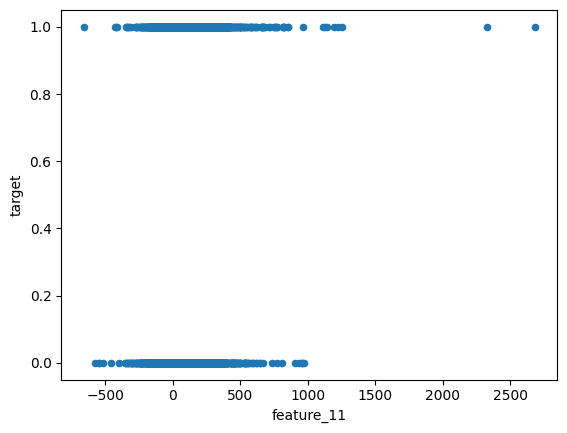

In [339]:
df[df['feature_11'] < 30000].plot(x='feature_11',y='target',kind='scatter');

In [340]:
df.groupby(['target','period'])['feature_0'].mean()

target  period
0       1         110.050485
        2         110.037397
        3         110.058077
        4         110.077948
        5         110.081755
        6         110.077000
        7         110.074093
        8         110.080547
        9         110.086602
        10        110.087423
        11        110.076210
        12        110.073978
1       1         110.041005
        2         110.041005
        3         110.077333
        4         110.088591
        5         110.070461
        6         110.072404
        7         110.050754
        8         110.064649
        9         110.068871
        10        110.073407
        11        110.072022
        12        110.081831
Name: feature_0, dtype: float64

In [341]:
df.groupby(['target','period'])['feature_0'].mean().unstack()

period,1,2,3,4,5,6,7,8,9,10,11,12
target,,,,,,,,,,,,
0,110.050485,110.037397,110.058077,110.077948,110.081755,110.077000,110.074093,110.080547,110.086602,110.087423,110.076210,110.073978
1,110.041005,110.041005,110.077333,110.088591,110.070461,110.072404,110.050754,110.064649,110.068871,110.073407,110.072022,110.081831


In [342]:
df.groupby(['target','period'])['feature_0'].mean().unstack().T

target,0,1
period,,
1,110.050485,110.041005
2,110.037397,110.041005
3,110.058077,110.077333
4,110.077948,110.088591
5,110.081755,110.070461
6,110.077000,110.072404
7,110.074093,110.050754
8,110.080547,110.064649
9,110.086602,110.068871


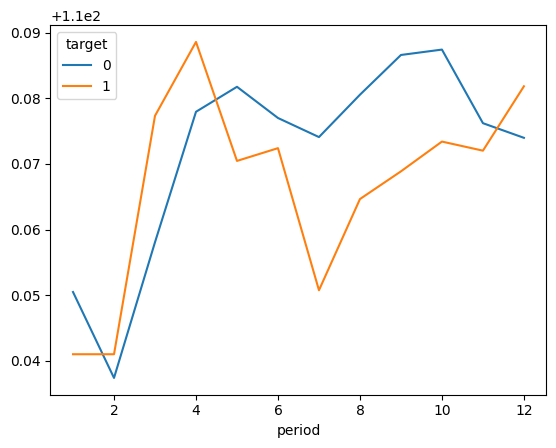

In [343]:
df.groupby(['target','period'])['feature_0'].mean().unstack().T.plot();

<Axes: xlabel='period'>

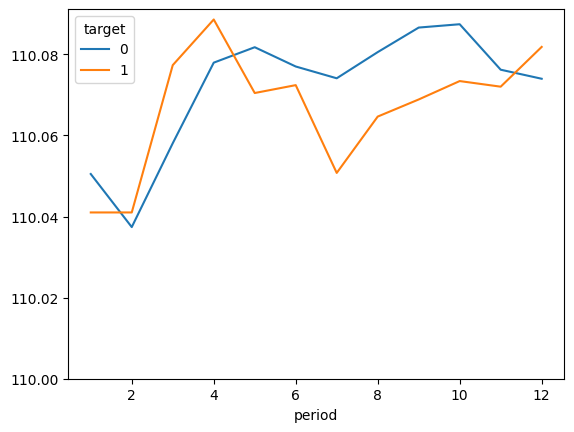

In [344]:
df.groupby(['target','period'])['feature_0'].mean().unstack().T.plot(ylim=110)

In [345]:
df.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target', 'feature_11>3000'],
      dtype='object')

In [346]:
cols = ['feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',]

In [347]:
from matplotlib import pyplot as plt

In [348]:
df.groupby(['target','period'])['feature_0'].count()

target  period
0       1         2060
        2         2059
        3         2049
        4         2027
        5         2006
        6         2000
        7         1984
        8         1974
        9         1963
        10        1956
        11        1942
        12        1933
1       1          756
        2          756
        3          750
        4          745
        5          738
        6          732
        7          729
        8          727
        9          726
        10         722
        11         722
        12         721
Name: feature_0, dtype: int64

feature_0


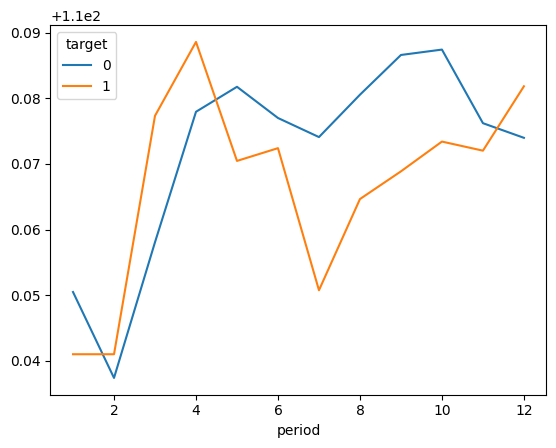

feature_1


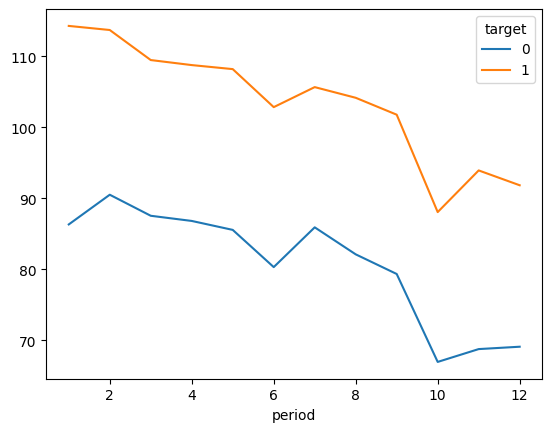

feature_2


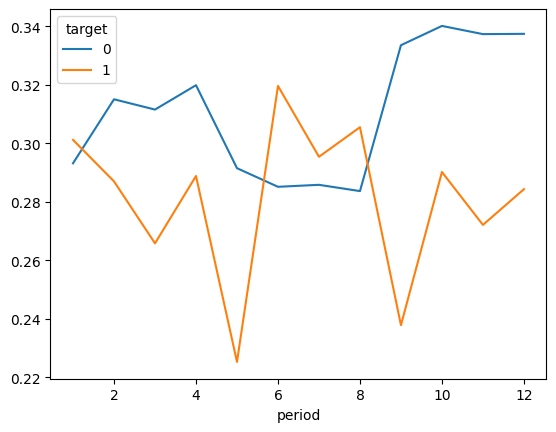

feature_3


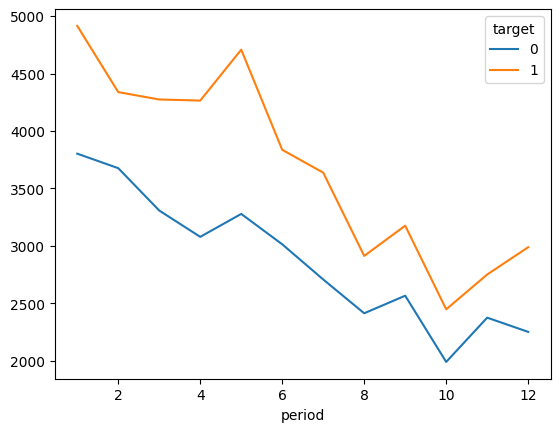

feature_4


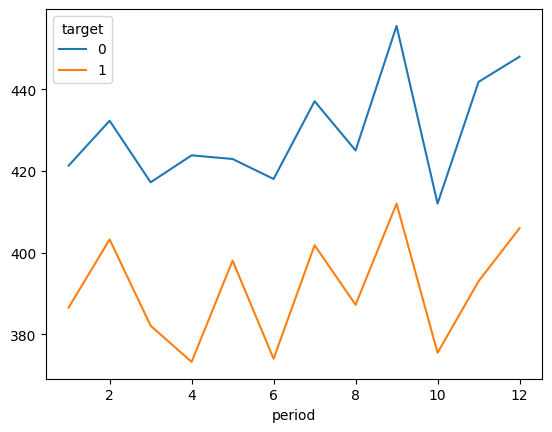

feature_5


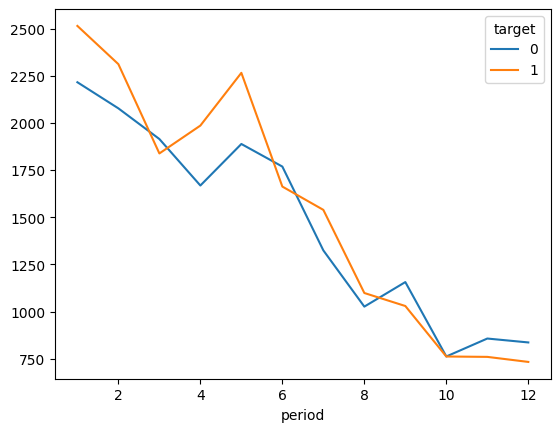

feature_6


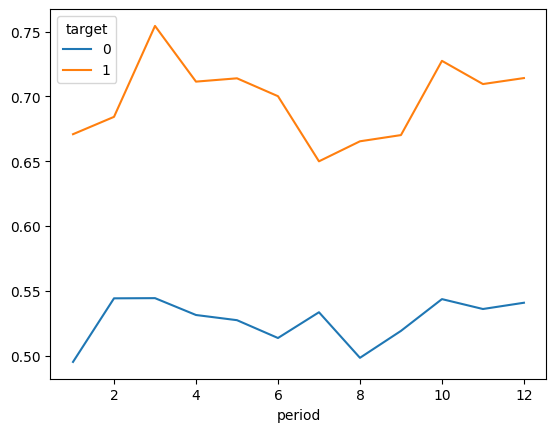

feature_7


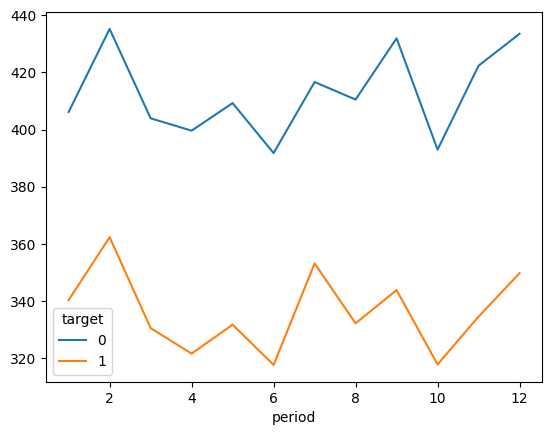

feature_8


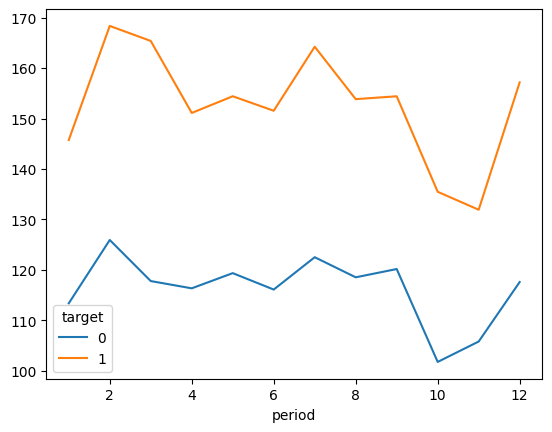

feature_9


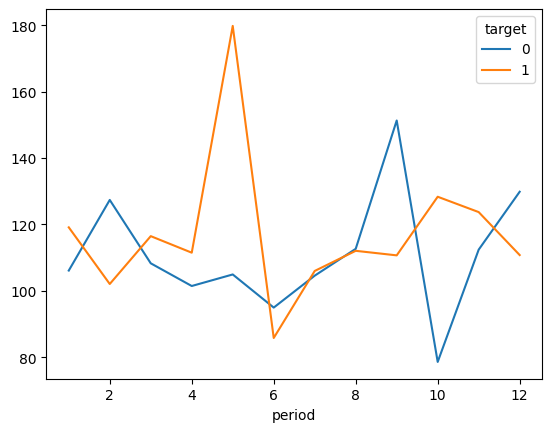

feature_10


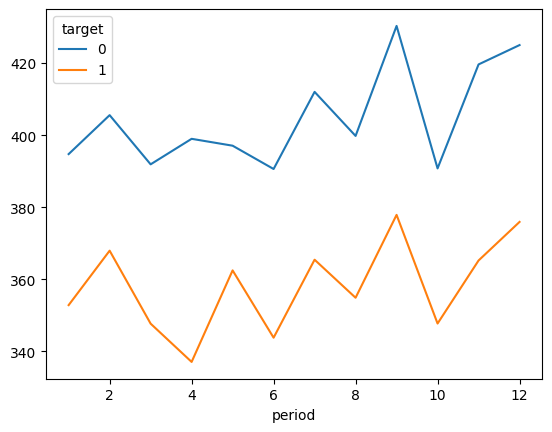

feature_11


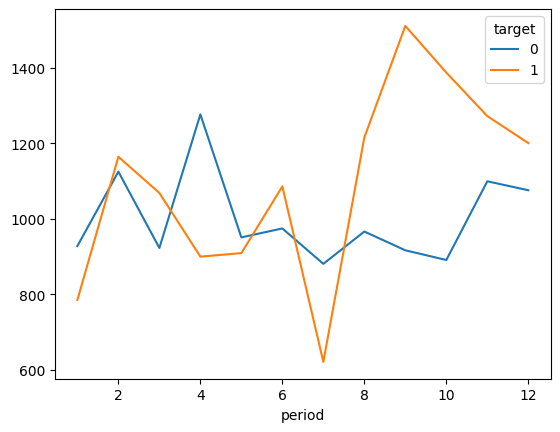

feature_12


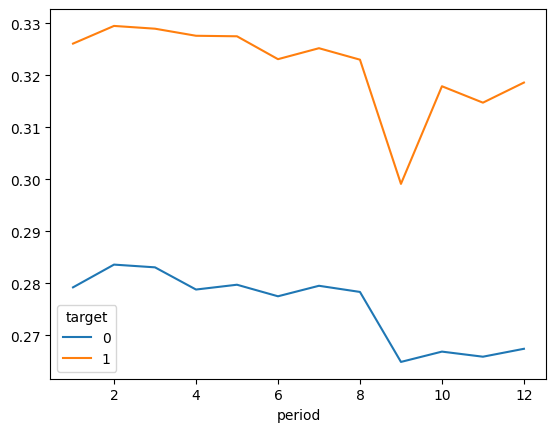

feature_13


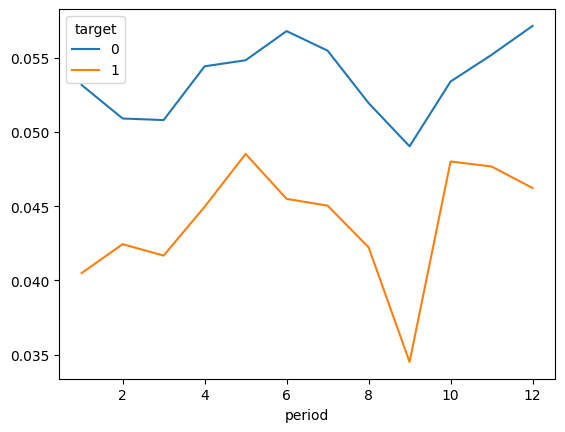

feature_14


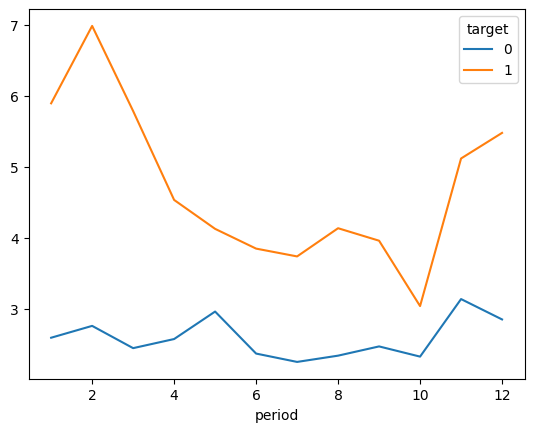

feature_15


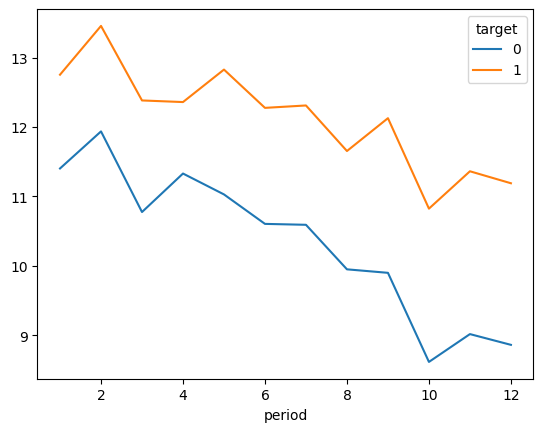

feature_16


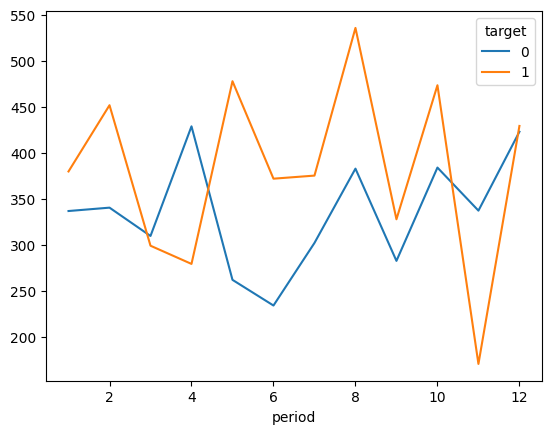

feature_17


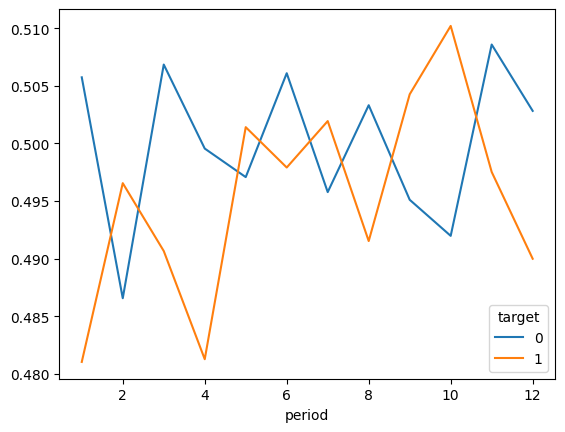

feature_18


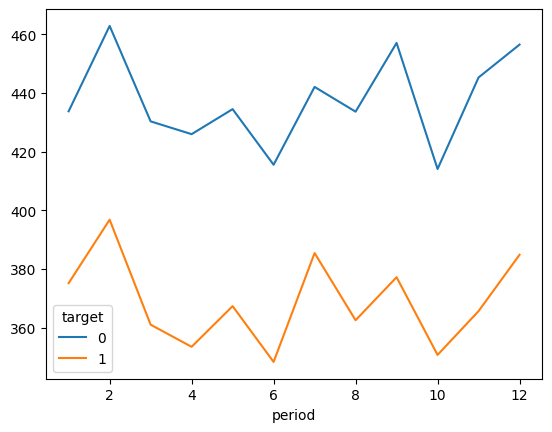

feature_19


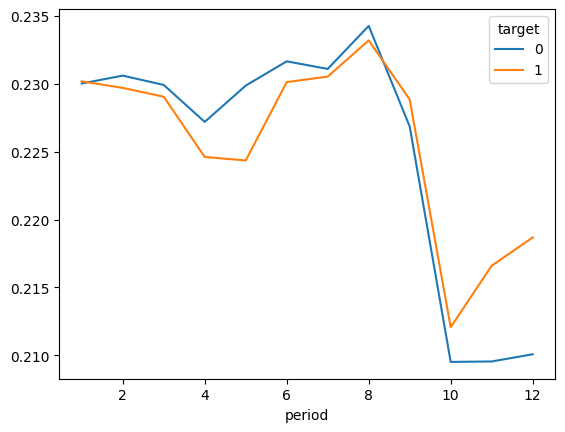

feature_20


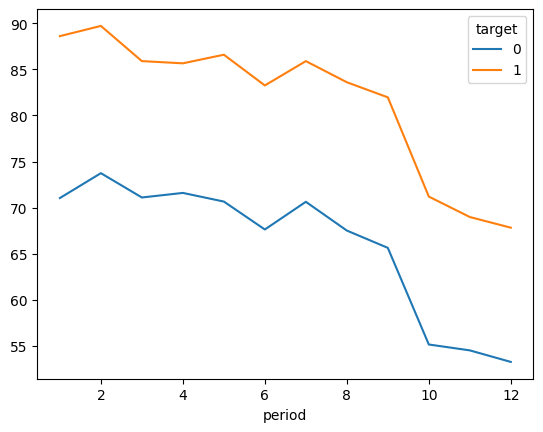

feature_21


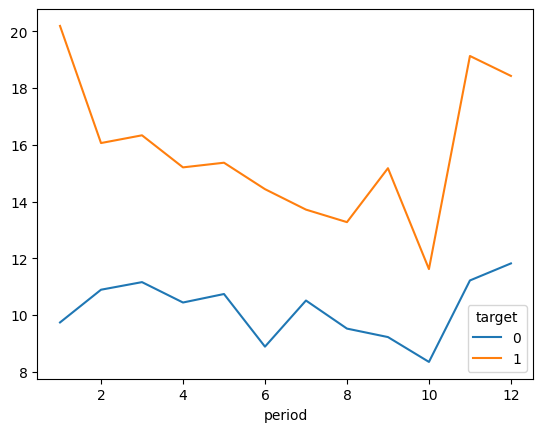

feature_22


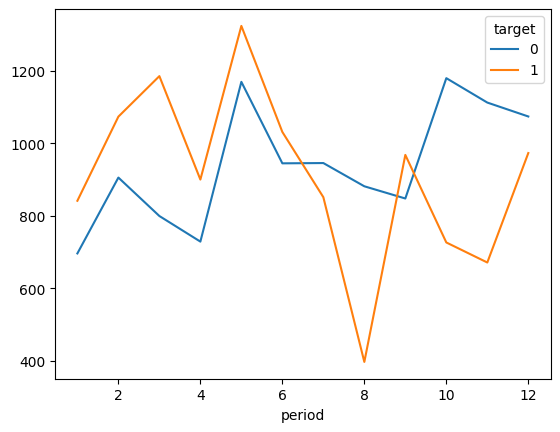

feature_23


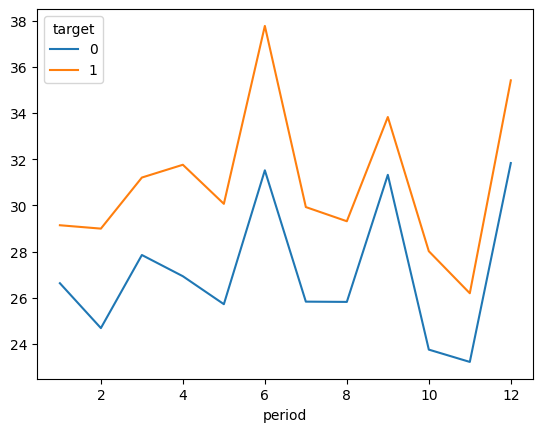

feature_24


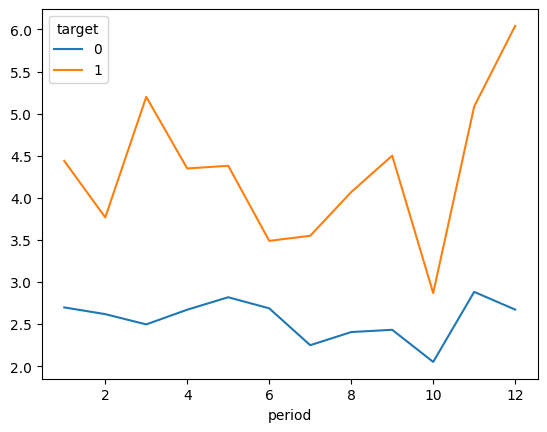

feature_26


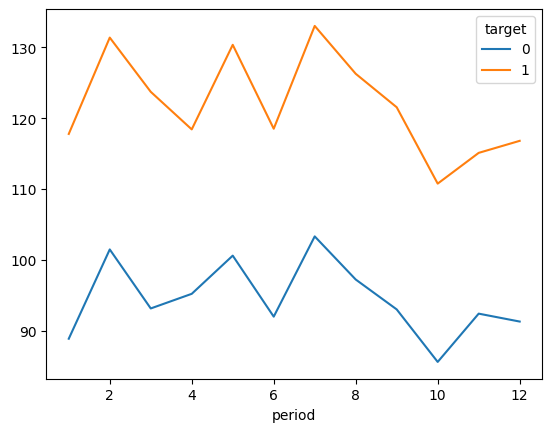

feature_27


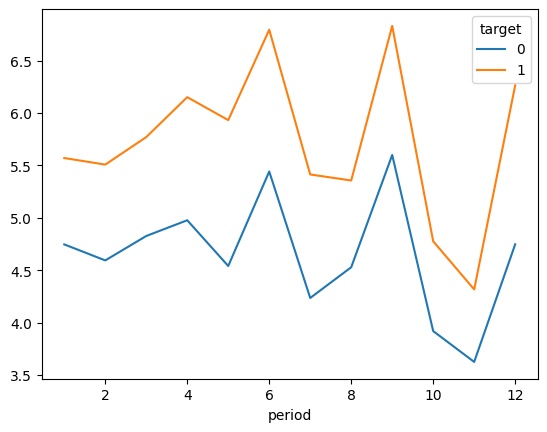

feature_28


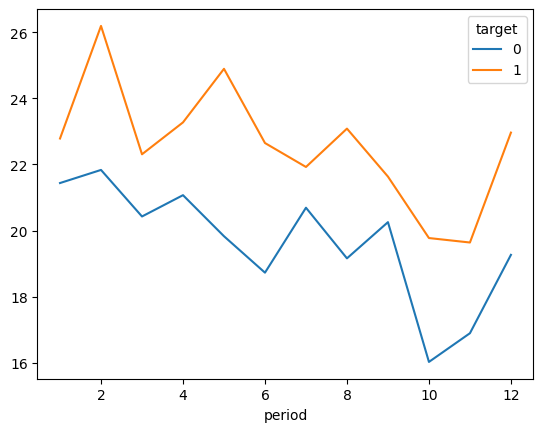

feature_29


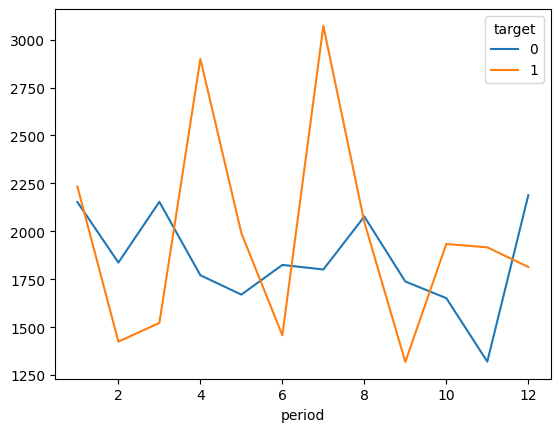

feature_30


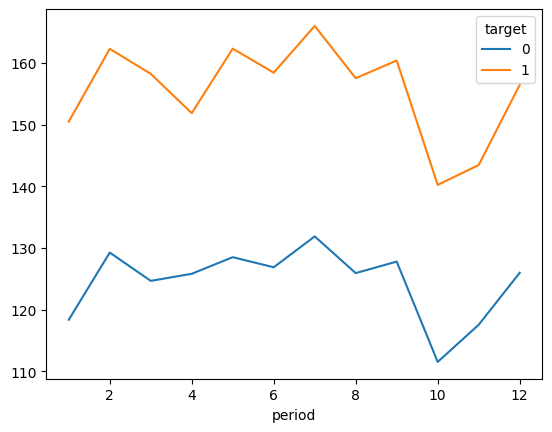

feature_31


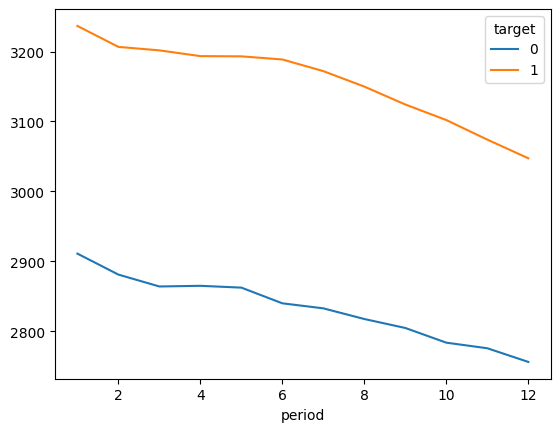

feature_32


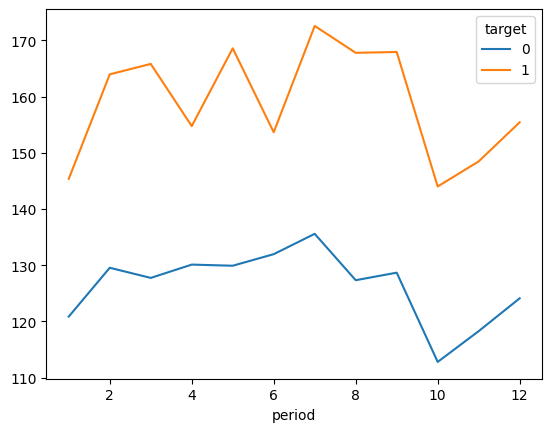

feature_33


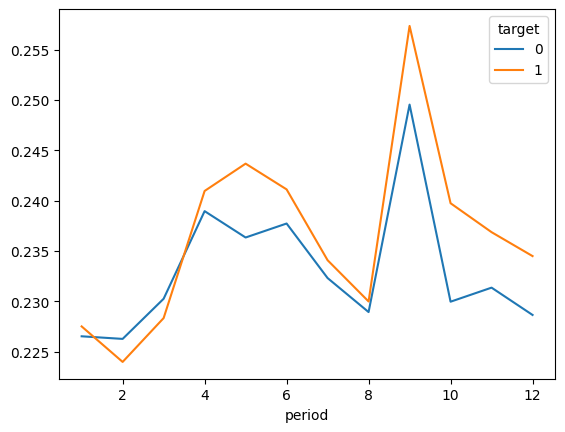

feature_34


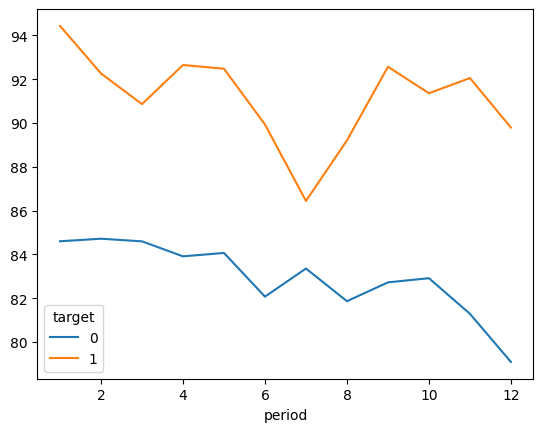

feature_35


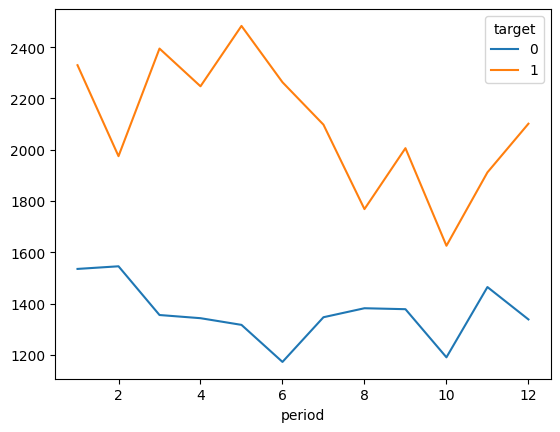

feature_36


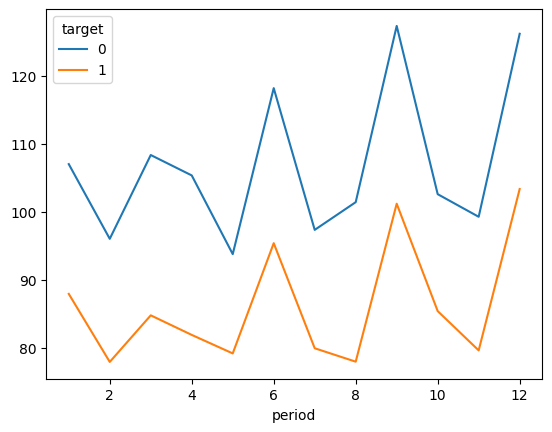

feature_37


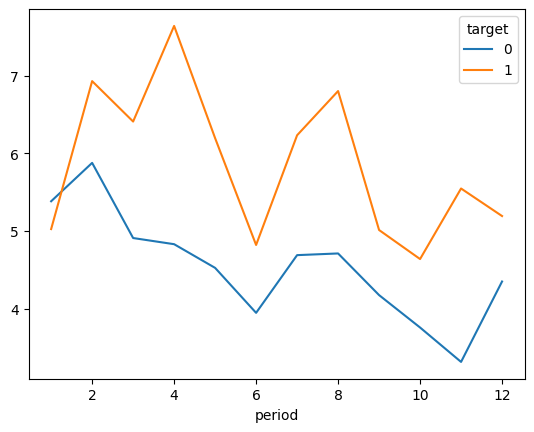

feature_38


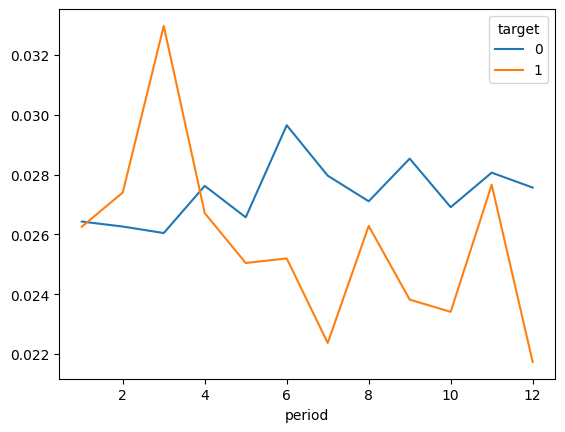

feature_39


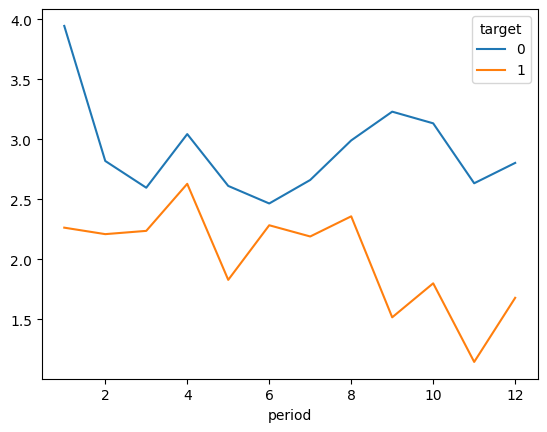

feature_40


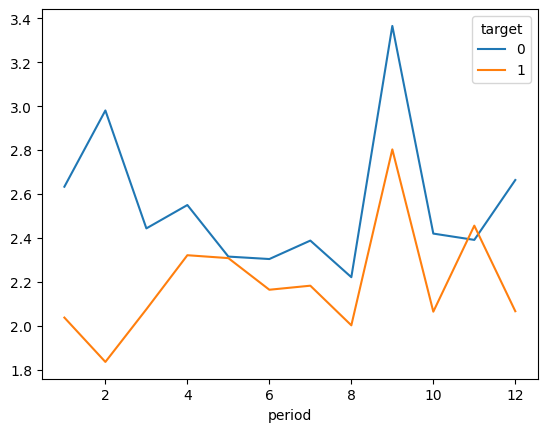

feature_42


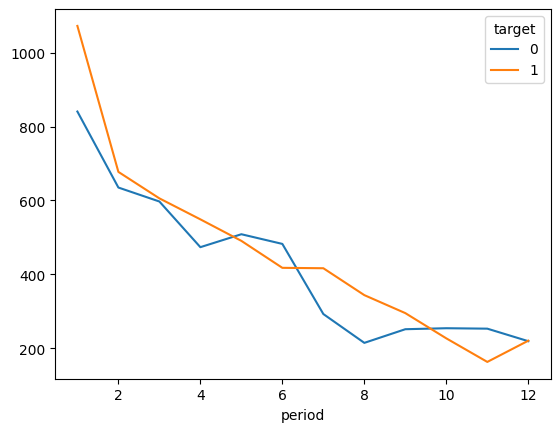

feature_43


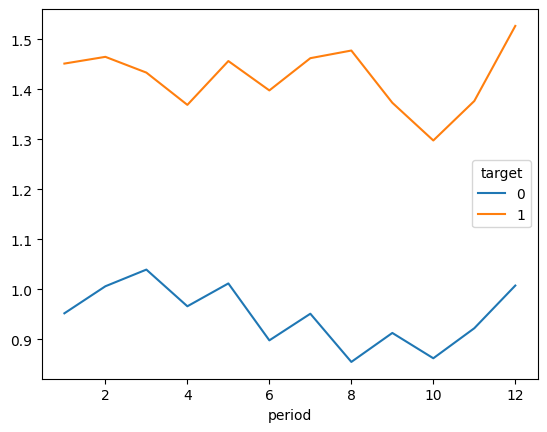

feature_44


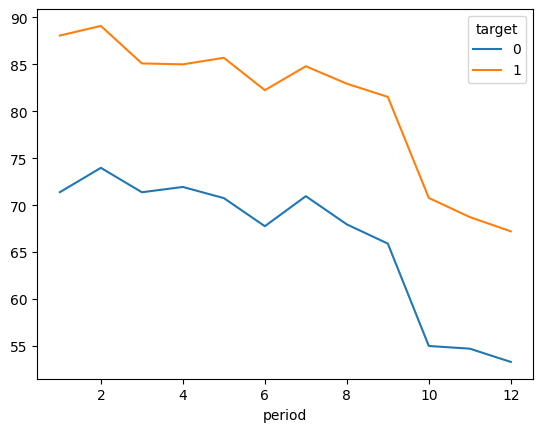

feature_45


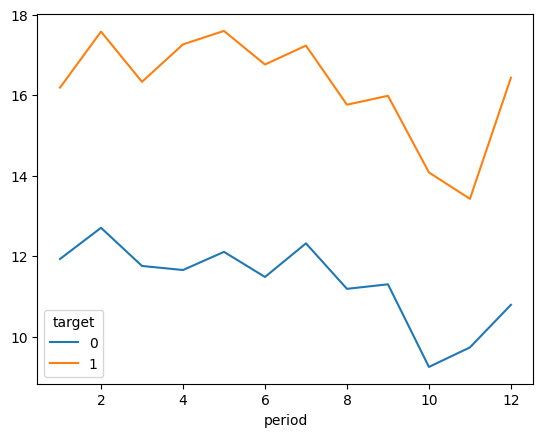

feature_46


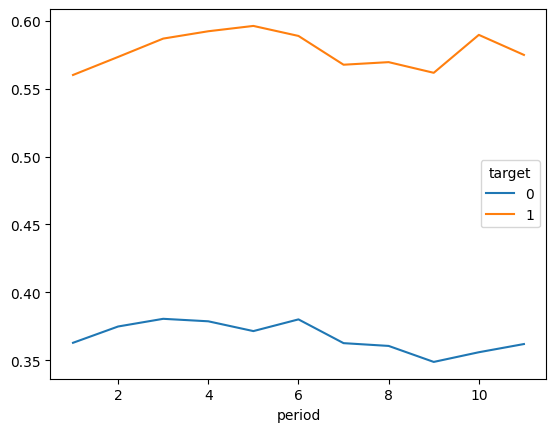

feature_47


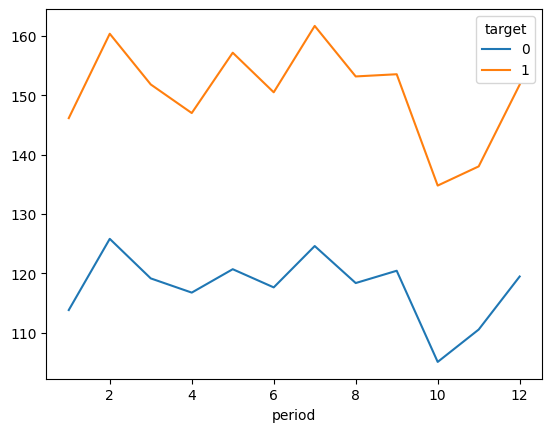

feature_48


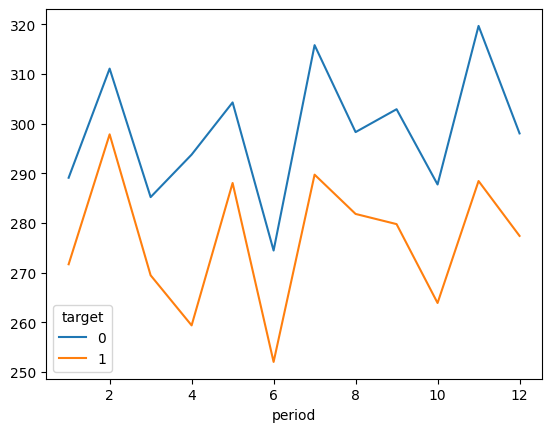

feature_49


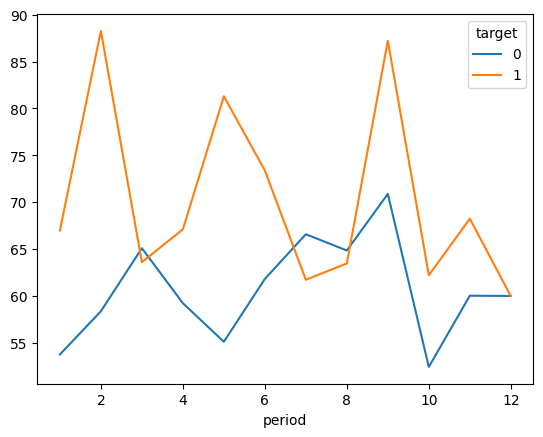

In [349]:
for col in cols:
  print(col)
  df.groupby(['target','period'])[col].mean().unstack().T.plot()
  plt.show()


In [350]:
df.groupby('target')['feature_27'].agg(['count','mean','median','std'])

,count,mean,median,std
target,,,,
0,23963,4.651355,0.00,12.411416
1,8692,5.724541,0.13,13.485418


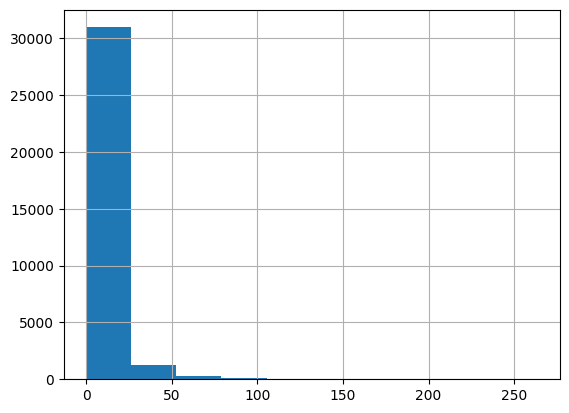

In [351]:
df['feature_27'].hist()
plt.show()

In [352]:
df['feature_27'].value_counts(normalize=True)

,proportion
feature_27,
0.00,0.545123
0.27,0.002389
0.30,0.002113
0.23,0.002052
0.35,0.001960
...,...
39.07,0.000031
63.65,0.000031
72.90,0.000031


In [353]:
df

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target,feature_11>3000
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.000000,0.323712,NaN,...,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28,0.0,0,0
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.000000,0.316798,NaN,...,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97,0.0,0,0
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.000000,0.339188,NaN,...,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78,0.0,0,0
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.000000,0.415428,NaN,...,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83,0.0,0,0
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.000000,0.569670,NaN,...,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,4083,8,110.0,326.97,0.075341,51748.802468,183.98,51853.985279,0.816545,143.07,...,10.277948,1.0,316.17,7.0,0.836954,107.0,149.05,8.0,0,0
34292,4083,9,110.0,158.04,0.177228,55868.890064,67.27,55621.921670,0.721748,63.35,...,55.430980,0.0,157.72,23.0,-0.845186,93.0,47.87,9.0,0,0
34293,4083,10,110.0,31.76,0.108558,61571.657643,65.63,61210.237966,0.660136,115.97,...,13.208262,1.0,19.80,4.0,0.627217,71.0,60.85,2.0,0,0
34294,4083,11,110.0,319.11,0.111005,44667.081471,160.37,44061.415943,0.795448,123.75,...,6.807361,0.0,317.19,1.0,0.678899,122.0,129.02,0.0,0,0


In [354]:
cols

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49']

In [355]:
features = df.groupby('id')[cols].agg(['count','mean','std']).reset_index()

In [356]:
features.head()

id feature_0                       feature_1                         \
         count        mean       std     count        mean        std   
0  0        12  110.000000  0.000000        12   60.916667  15.617710   
1  2        12  110.166667  0.389249        12    0.597500   1.734275   
2  6        12  110.000000  0.000000        12   61.508333  17.293809   
3  7        12  110.000000  0.000000        12  105.791667  26.850985   
4  8        12  110.333333  0.492366        12    1.250000   4.330127   

  feature_2                      ... feature_46 feature_47              \
      count      mean       std  ...        std      count        mean   
0        12  0.238880  0.160349  ...   0.412681         12  142.833333   
1         1  5.203073       NaN  ...   0.079088         12   10.083333   
2        12  0.329164  0.107094  ...   0.010449         12  259.416667   
3        12  0.068348  0.011823  ...   0.021931         12  310.333333   
4        12  0.118104  0.096407  ...   0.474472         12    2.000000   

             feature_48                          feature_49              \
         std      count         mean         std      count        mean   
0  36.580753         12   315.011667  191.882651         12    0.250000   
1  11.935115         12     2.470000    5.151686         12    0.000000   
2  56.527481         12  1490.987500  218.390497         12  202.557415   
3  32.764541         12   794.329167  143.289237         12    0.750000   
4   2.174229         12     0.110000    0.260280         12    0.000000   

               
          std  
0    0.621582  
1    0.000000  
2  693.492939  
3    0.753778  
4    0.000000  

[5 rows x 145 columns]

In [357]:
features.columns = ['_'.join(col).strip('_') for col in features.columns.values]

In [358]:
features

,id,feature_0_count,feature_0_mean,feature_0_std,feature_1_count,feature_1_mean,feature_1_std,feature_2_count,feature_2_mean,feature_2_std,...,feature_46_std,feature_47_count,feature_47_mean,feature_47_std,feature_48_count,feature_48_mean,feature_48_std,feature_49_count,feature_49_mean,feature_49_std
0,0,12,110.000000,0.000000,12,60.916667,15.617710,12,0.238880,0.160349,...,0.412681,12,142.833333,36.580753,12,315.011667,191.882651,12,0.250000,0.621582
1,2,12,110.166667,0.389249,12,0.597500,1.734275,1,5.203073,NaN,...,0.079088,12,10.083333,11.935115,12,2.470000,5.151686,12,0.000000,0.000000
2,6,12,110.000000,0.000000,12,61.508333,17.293809,12,0.329164,0.107094,...,0.010449,12,259.416667,56.527481,12,1490.987500,218.390497,12,202.557415,693.492939
3,7,12,110.000000,0.000000,12,105.791667,26.850985,12,0.068348,0.011823,...,0.021931,12,310.333333,32.764541,12,794.329167,143.289237,12,0.750000,0.753778
4,8,12,110.333333,0.492366,12,1.250000,4.330127,12,0.118104,0.096407,...,0.474472,12,2.000000,2.174229,12,0.110000,0.260280,12,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,4078,12,110.000000,0.000000,12,75.101667,28.781314,12,0.206196,0.072146,...,0.042322,12,171.333333,51.862289,12,405.456667,210.211645,12,1.333333,2.424621
2854,4079,12,110.000000,0.000000,12,59.713333,11.652977,12,0.426572,0.167567,...,0.393138,12,42.583333,12.880276,12,75.700833,32.531430,12,5.500000,4.562695
2855,4080,12,110.000000,0.000000,12,50.550833,18.791079,12,0.747303,1.435190,...,0.261068,12,13.000000,8.022695,12,27.109167,40.874742,12,193.224734,660.859475
2856,4081,12,110.000000,0.000000,12,38.124167,31.008819,12,0.551386,0.113720,...,0.206453,12,31.500000,14.737090,12,19.492500,17.736282,12,1.416667,1.975225


In [359]:
features = features.merge(hash_joined,how='left',on='id').copy()

In [360]:
features.head()

,id,feature_0_count,feature_0_mean,feature_0_std,feature_1_count,feature_1_mean,feature_1_std,feature_2_count,feature_2_mean,feature_2_std,...,feature_47_count,feature_47_mean,feature_47_std,feature_48_count,feature_48_mean,feature_48_std,feature_49_count,feature_49_mean,feature_49_std,feature_50
0,0,12,110.000000,0.000000,12,60.916667,15.617710,12,0.238880,0.160349,...,12,142.833333,36.580753,12,315.011667,191.882651,12,0.250000,0.621582,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,2,12,110.166667,0.389249,12,0.597500,1.734275,1,5.203073,NaN,...,12,10.083333,11.935115,12,2.470000,5.151686,12,0.000000,0.000000,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
2,6,12,110.000000,0.000000,12,61.508333,17.293809,12,0.329164,0.107094,...,12,259.416667,56.527481,12,1490.987500,218.390497,12,202.557415,693.492939,559b085762005073104ddce7d85c9a5afe68d319 556f9...
3,7,12,110.000000,0.000000,12,105.791667,26.850985,12,0.068348,0.011823,...,12,310.333333,32.764541,12,794.329167,143.289237,12,0.750000,0.753778,71383d1eddea9398323784c83037f9d461f90693 87812...
4,8,12,110.333333,0.492366,12,1.250000,4.330127,12,0.118104,0.096407,...,12,2.000000,2.174229,12,0.110000,0.260280,12,0.000000,0.000000,f6c864a369acd3a0062f18f749c60ba659f505d1 1cbeb...


In [361]:
feature_25 = df.groupby('id')['feature_25'].apply(lambda x: ' '.join(x)).reset_index().copy()

In [362]:
features = features.merge(feature_25,how='left',on='id').copy()

In [363]:
len(features)

2858

In [364]:
features[['feature_25','feature_50']].isna().mean()

,0
feature_25,0.0
feature_50,0.0


In [365]:
features = features.merge(train,on='id')

In [366]:
train = features.sample(frac=0.7,random_state=42).copy()
val = features[~features.index.isin(train.index)]

In [367]:
len(train) + len(val)

2858

In [368]:
list(features.columns)

['id',
 'feature_0_count',
 'feature_0_mean',
 'feature_0_std',
 'feature_1_count',
 'feature_1_mean',
 'feature_1_std',
 'feature_2_count',
 'feature_2_mean',
 'feature_2_std',
 'feature_3_count',
 'feature_3_mean',
 'feature_3_std',
 'feature_4_count',
 'feature_4_mean',
 'feature_4_std',
 'feature_5_count',
 'feature_5_mean',
 'feature_5_std',
 'feature_6_count',
 'feature_6_mean',
 'feature_6_std',
 'feature_7_count',
 'feature_7_mean',
 'feature_7_std',
 'feature_8_count',
 'feature_8_mean',
 'feature_8_std',
 'feature_9_count',
 'feature_9_mean',
 'feature_9_std',
 'feature_10_count',
 'feature_10_mean',
 'feature_10_std',
 'feature_11_count',
 'feature_11_mean',
 'feature_11_std',
 'feature_12_count',
 'feature_12_mean',
 'feature_12_std',
 'feature_13_count',
 'feature_13_mean',
 'feature_13_std',
 'feature_14_count',
 'feature_14_mean',
 'feature_14_std',
 'feature_15_count',
 'feature_15_mean',
 'feature_15_std',
 'feature_16_count',
 'feature_16_mean',
 'feature_16_std',
 'f

In [369]:
X_col = ['feature_0_count',
 'feature_0_mean',
 'feature_0_std',
 'feature_1_count',
 'feature_1_mean',
 'feature_1_std',
 'feature_2_count',
 'feature_2_mean',
 'feature_2_std',
 'feature_3_count',
 'feature_3_mean',
 'feature_3_std',
 'feature_4_count',
 'feature_4_mean',
 'feature_4_std',
 'feature_5_count',
 'feature_5_mean',
 'feature_5_std',
 'feature_6_count',
 'feature_6_mean',
 'feature_6_std',
 'feature_7_count',
 'feature_7_mean',
 'feature_7_std',
 'feature_8_count',
 'feature_8_mean',
 'feature_8_std',
 'feature_9_count',
 'feature_9_mean',
 'feature_9_std',
 'feature_10_count',
 'feature_10_mean',
 'feature_10_std',
 'feature_11_count',
 'feature_11_mean',
 'feature_11_std',
 'feature_12_count',
 'feature_12_mean',
 'feature_12_std',
 'feature_13_count',
 'feature_13_mean',
 'feature_13_std',
 'feature_14_count',
 'feature_14_mean',
 'feature_14_std',
 'feature_15_count',
 'feature_15_mean',
 'feature_15_std',
 'feature_16_count',
 'feature_16_mean',
 'feature_16_std',
 'feature_17_count',
 'feature_17_mean',
 'feature_17_std',
 'feature_18_count',
 'feature_18_mean',
 'feature_18_std',
 'feature_19_count',
 'feature_19_mean',
 'feature_19_std',
 'feature_20_count',
 'feature_20_mean',
 'feature_20_std',
 'feature_21_count',
 'feature_21_mean',
 'feature_21_std',
 'feature_22_count',
 'feature_22_mean',
 'feature_22_std',
 'feature_23_count',
 'feature_23_mean',
 'feature_23_std',
 'feature_24_count',
 'feature_24_mean',
 'feature_24_std',
 'feature_26_count',
 'feature_26_mean',
 'feature_26_std',
 'feature_27_count',
 'feature_27_mean',
 'feature_27_std',
 'feature_28_count',
 'feature_28_mean',
 'feature_28_std',
 'feature_29_count',
 'feature_29_mean',
 'feature_29_std',
 'feature_30_count',
 'feature_30_mean',
 'feature_30_std',
 'feature_31_count',
 'feature_31_mean',
 'feature_31_std',
 'feature_32_count',
 'feature_32_mean',
 'feature_32_std',
 'feature_33_count',
 'feature_33_mean',
 'feature_33_std',
 'feature_34_count',
 'feature_34_mean',
 'feature_34_std',
 'feature_35_count',
 'feature_35_mean',
 'feature_35_std',
 'feature_36_count',
 'feature_36_mean',
 'feature_36_std',
 'feature_37_count',
 'feature_37_mean',
 'feature_37_std',
 'feature_38_count',
 'feature_38_mean',
 'feature_38_std',
 'feature_39_count',
 'feature_39_mean',
 'feature_39_std',
 'feature_40_count',
 'feature_40_mean',
 'feature_40_std',
 'feature_42_count',
 'feature_42_mean',
 'feature_42_std',
 'feature_43_count',
 'feature_43_mean',
 'feature_43_std',
 'feature_44_count',
 'feature_44_mean',
 'feature_44_std',
 'feature_45_count',
 'feature_45_mean',
 'feature_45_std',
 'feature_46_count',
 'feature_46_mean',
 'feature_46_std',
 'feature_47_count',
 'feature_47_mean',
 'feature_47_std',
 'feature_48_count',
 'feature_48_mean',
 'feature_48_std',
 'feature_49_count',
 'feature_49_mean',
 'feature_49_std',
 'feature_50_x',
 'feature_25']
y_col = ['target']
text_features = ['feature_50_x','feature_25']

In [370]:
model = CatBoostClassifier(learning_rate=0.01,verbose=100,eval_metric='AUC',text_features=text_features,
                           )
model.fit(train[X_col],train[y_col],eval_set=(val[X_col],val[y_col]),early_stopping_rounds=100)

0:	test: 0.6363091	best: 0.6363091 (0)	total: 261ms	remaining: 4m 20s
100:	test: 0.7455437	best: 0.7459714 (98)	total: 27.9s	remaining: 4m 8s
200:	test: 0.7494776	best: 0.7495898 (199)	total: 55.9s	remaining: 3m 42s
300:	test: 0.7529837	best: 0.7530398 (275)	total: 1m 23s	remaining: 3m 13s
400:	test: 0.7555573	best: 0.7555783 (387)	total: 1m 51s	remaining: 2m 46s
500:	test: 0.7583762	best: 0.7583762 (500)	total: 2m 19s	remaining: 2m 19s
600:	test: 0.7594701	best: 0.7595823 (596)	total: 2m 47s	remaining: 1m 51s
700:	test: 0.7605430	best: 0.7610058 (670)	total: 3m 14s	remaining: 1m 23s
800:	test: 0.7621068	best: 0.7621909 (799)	total: 3m 44s	remaining: 55.8s
900:	test: 0.7613985	best: 0.7631656 (860)	total: 4m 12s	remaining: 27.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7631656452
bestIteration = 860

Shrink model to first 861 iterations.


In [381]:
train.shape

(2001, 149)

In [372]:
fi = pd.DataFrame({'name':X_col,'w':model.feature_importances_})

In [373]:
fi.sort_values('w',ascending=False,inplace=True)

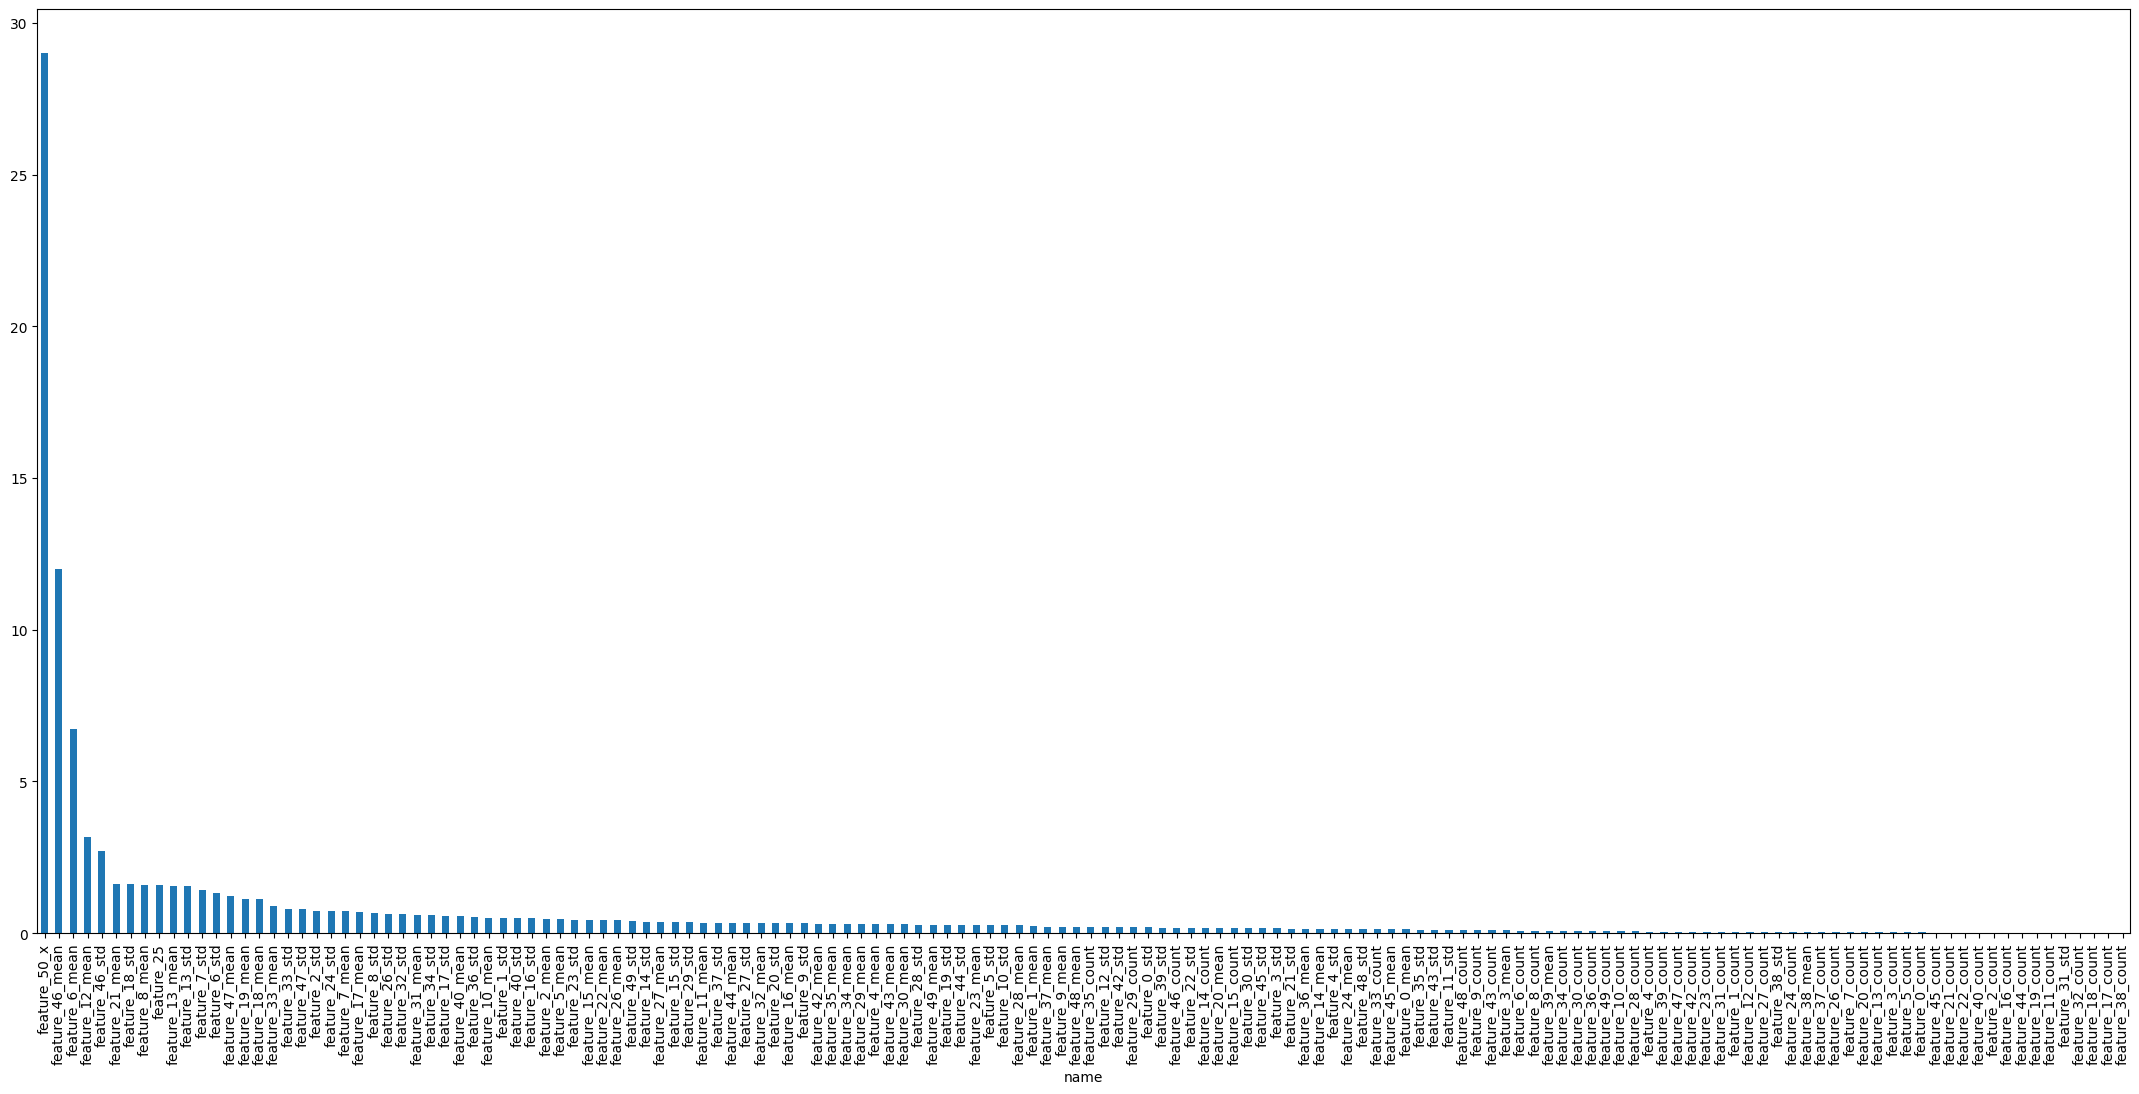

In [374]:
fi.set_index('name')['w'].plot(kind='bar',figsize=(27,12))
plt.show()

In [375]:
tabular_data.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0.00,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,15.75,0.00,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.00,0.07,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0.00,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,26.75,0.95,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


In [376]:
tabular_data['feature_43'].value_counts()

,count
feature_43,
0.0,40898
1.0,7405
2.0,3154
3.0,1676
4.0,1048
5.0,835
6.0,551
7.0,435
8.0,332


In [377]:
tabular_data[tabular_data['feature_43'] == 29]

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_39,feature_40,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
9306,775,7,110.0,160.90,0.020991,0.000000,5517.27,0.000000,0.009739,4180.55,...,0.00,19.70,0.000000,29.0,7.90,5.0,-0.000993,1026.0,4536.27,4.0
13075,1089,8,110.0,94.00,0.056467,0.000000,1314.13,0.000000,0.389229,815.82,...,2.95,3.45,0.000000,29.0,36.00,1.0,0.049866,301.0,926.47,0.0
19754,1646,3,110.0,212.80,0.004148,2659.151954,1413.52,0.000000,0.854260,673.20,...,0.02,14.64,0.629232,29.0,150.00,36.0,0.827676,568.0,1002.92,33.0
21947,1828,12,110.0,105.85,0.025275,6945.979790,1646.48,0.000000,0.214024,2080.58,...,0.00,8.85,0.542517,29.0,NaN,12.0,NaN,611.0,1170.62,12.0
25596,2133,1,110.0,296.15,0.053395,37429.098127,554.28,0.000000,0.528842,408.68,...,0.00,2.53,688.563874,29.0,176.65,10.0,0.024679,224.0,397.20,7.0
34097,2841,6,110.0,327.00,0.009347,54707.003100,NaN,54827.103289,0.939475,690.02,...,0.00,2.20,17.807341,29.0,206.00,24.0,0.068633,258.0,955.87,45.0
43470,3622,7,110.0,157.00,0.061379,37060.494877,NaN,33589.548981,0.814469,1237.92,...,0.00,0.25,18.256267,29.0,157.00,4.0,0.379676,127.0,937.70,3.0
51874,4322,11,110.0,96.50,0.152524,2497.344836,487.12,0.000000,0.151410,322.15,...,0.00,1.27,9.505250,29.0,95.00,15.0,0.102478,94.0,329.95,38.0
52775,4397,12,110.0,156.06,0.021675,31747.016954,334.78,30842.852901,0.983688,144.42,...,0.00,6.12,98.084832,29.0,155.00,305.0,NaN,65.0,65.40,159.0
57984,4832,1,110.0,604.84,0.004149,0.000000,1113.82,0.000000,0.955847,223.90,...,0.02,4.02,0.000000,29.0,218.93,284.0,0.744711,207.0,539.88,345.0


In [378]:
tabular_data[tabular_data['id'] == 775]['feature_43']

,feature_43
9300,30.0
9301,31.0
9302,30.0
9303,31.0
9304,30.0
9305,25.0
9306,29.0
9307,23.0
9308,30.0
9309,27.0
